In [1]:
# Importing aux libraries
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import gempy as gp

WARN: Could not locate executable g77
WARN: Could not locate executable f77
WARN: Could not locate executable ifort
WARN: Could not locate executable ifl
WARN: Could not locate executable f90
WARN: Could not locate executable efl


c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Optimized (vendor) Blas libraries are not found.
    Falls back to netlib Blas library which has worse performance.
    A better performance should be easily gained by switching
    Blas library.
  if self._calc_info(blas):
c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Blas (http://www.netlib.org/blas/) libraries not found.
    Directories to search for the libraries can be specified in the
    numpy/distutils/site.cfg file (section [blas]) or by setting
    the BLAS environment variable.
  if self._calc_info(blas):
c:\ProgramData\anaconda3\envs\gempy1\lib\site-packages\numpy\distutils\system_info.py:2159: UserWarning: 
    Blas (http://www.netlib.org/blas/) sources not found.
    Directories to search for the sources can be specified in the
    numpy/distutils/site.cfg file (section [blas_src]) or by setting
    t

In [3]:
geo_model = gp.create_model('Perarolo_1')

In [4]:
data_path = 'C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/'
# Importing the data from CSV-files and setting extent and resolution
gp.init_data(geo_model, [60, 220., -60., 60., 0, 140.], [200, 200, 200],
             path_i=data_path + "layer_i.csv",
             path_o=data_path + "layer_o.csv",
             default_values=True)

Active grids: ['regular']


Perarolo_1  2024-04-28 10:40

In [5]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,gravely_layer,Default series,1,#015482,1
1,clay_layer,Default series,2,#9f0052,2
2,altered_bedrock,Default series,3,#ffbe00,3
3,Main_Fault,Default series,4,#728f02,4
4,basement,Basement,1,#443988,5


In [6]:
gp.get_data(geo_model, 'surface_points').head()

,X,Y,Z,smooth,surface
0,189.151409,3.324576,82.019165,0.000002,gravely_layer
1,191.287749,32.554706,83.331177,0.000002,gravely_layer
2,174.447524,51.723066,82.413208,0.000002,gravely_layer
3,183.125982,-60.670487,68.730652,0.000002,gravely_layer
4,158.544182,-2.333660,74.293701,0.000002,gravely_layer


In [7]:
gp.get_data(geo_model, 'orientations').head()

,X,Y,Z,G_x,G_y,G_z,smooth,surface
3,200,0,90,1.000000e-12,1.000000e-12,1.00000,0.01,gravely_layer
2,200,0,65,1.000000e-12,1.000000e-12,1.00000,0.01,clay_layer
1,200,0,52,1.000000e-12,1.000000e-12,1.00000,0.01,altered_bedrock
0,180,-40,65,1.000000e-12,9.396926e-01,0.34202,0.01,Main_Fault


In [9]:
gp.map_stack_to_surfaces(geo_model,
                         {#"Strat_Series1": ('topo'),
                          "Fault_Series": 'Main_Fault',
                          "Strat_Series2": ('gravely_layer', 'clay_layer',
                                           'altered_bedrock')},
                         set_features=True,
                         remove_unused_series=True)
#"Fault_Series": 'Main_Fault',

,surface,series,order_surfaces,color,id
3,Main_Fault,Fault_Series,1,#728f02,1
0,gravely_layer,Strat_Series2,1,#015482,2
1,clay_layer,Strat_Series2,2,#9f0052,3
2,altered_bedrock,Strat_Series2,3,#ffbe00,4
4,basement,Basement,1,#443988,5


In [10]:
section_dict = {'section1': ([60, 0], [220, 0], [50, 50]),
                'section2': ([170, 60], [170, -60], [50, 50])}  # p1,p2,resolution
geo_model.set_section_grid(section_dict)

Active grids: ['regular' 'sections']


,start,stop,resolution,dist
section1,"[60, 0]","[220, 0]","[50, 50]",160.0
section2,"[170, 60]","[170, -60]","[50, 50]",120.0


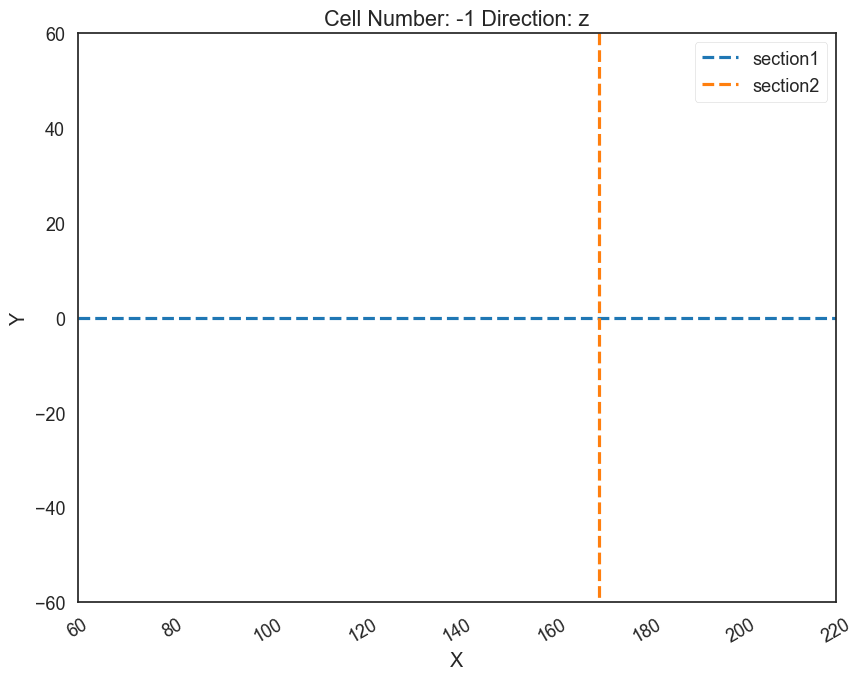

In [11]:
geo_model.get_active_grids()
gp.plot.plot_section_traces(geo_model)

In [12]:
geo_model.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.
Fault colors changed. If you do not like this behavior, set change_color to False.


,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series2,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [13]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series2,Basement
Fault_Series,False,True,True
Strat_Series2,False,False,False
Basement,False,False,False


In [14]:
geo_model.faults

,order_series,BottomRelation,isActive,isFault,isFinite
Fault_Series,1,Fault,True,True,False
Strat_Series2,2,Erosion,True,False,False
Basement,3,Erosion,False,False,False


In [15]:
geo_model.faults.faults_relations_df

,Fault_Series,Strat_Series2,Basement
Fault_Series,False,True,True
Strat_Series2,False,False,False
Basement,False,False,False


C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()
C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()
C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


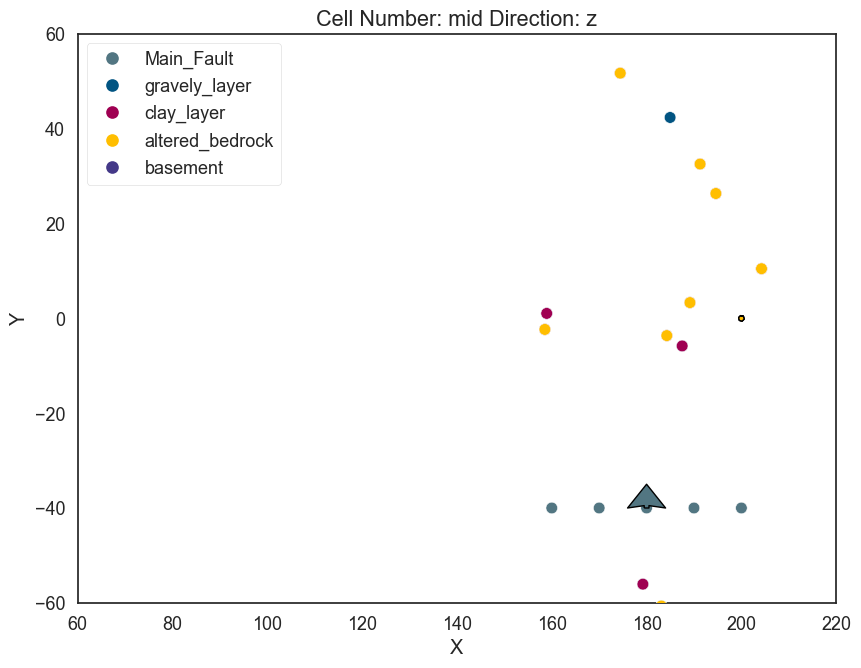

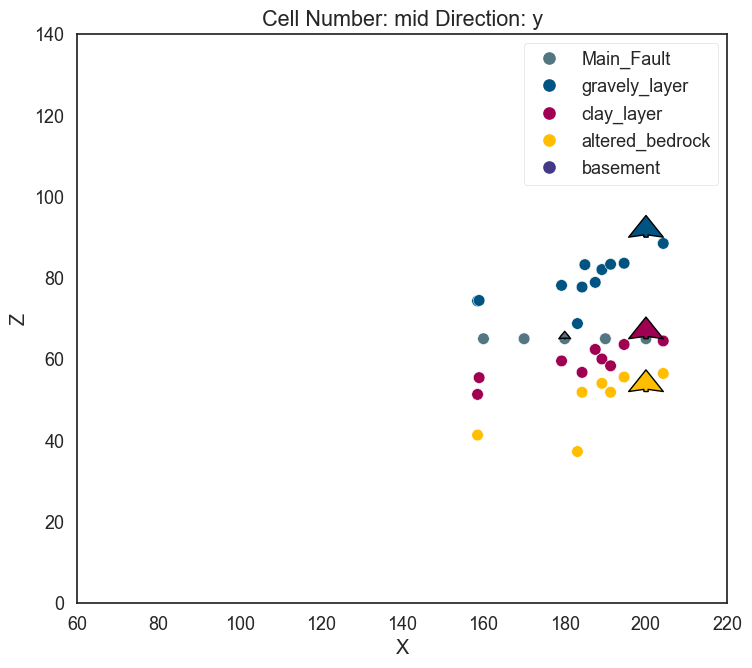

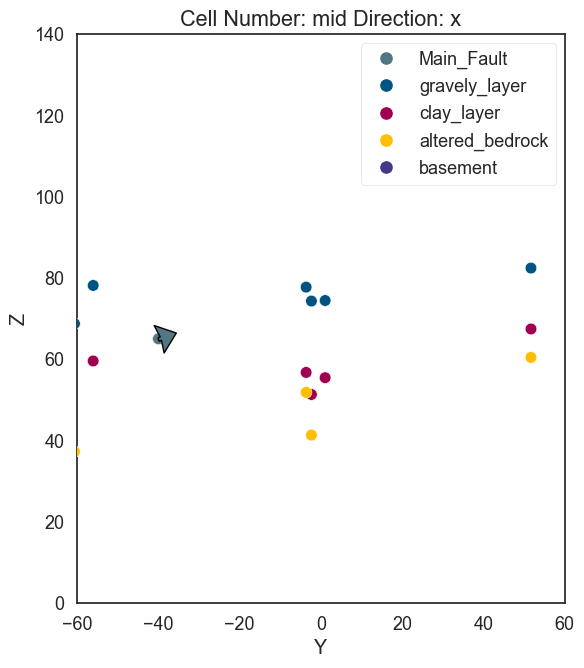

In [16]:
plot = gp.plot_2d(geo_model, direction = 'z', show_lith=False, show_boundaries=False)
plot = gp.plot_2d(geo_model, direction = 'y', show_lith=False, show_boundaries=False)
plot = gp.plot_2d(geo_model, direction = 'x', show_lith=False, show_boundaries=False)

In [17]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic')

C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [18]:
gp.set_interpolator(geo_model,          
                    compile_theano=False,
                    theano_optimizer='fast_compile',
                    )

#with compile_theano=True it's really slow

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  1
Compilation Done!
Kriging values: 
                       values
range             244.131112
$C_o$            1419.047619
drift equations    [3, 3, 3]


In [19]:
gp.get_data(geo_model, 'kriging')

,values
range,244.131112
$C_o$,1419.047619
drift equations,"[3, 3, 3]"


In [20]:
fp = data_path + "topo_1_extrap.tif"
fp

'C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/topo_1_extrap.tif'

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography' 'sections']


C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  p.fig.show()


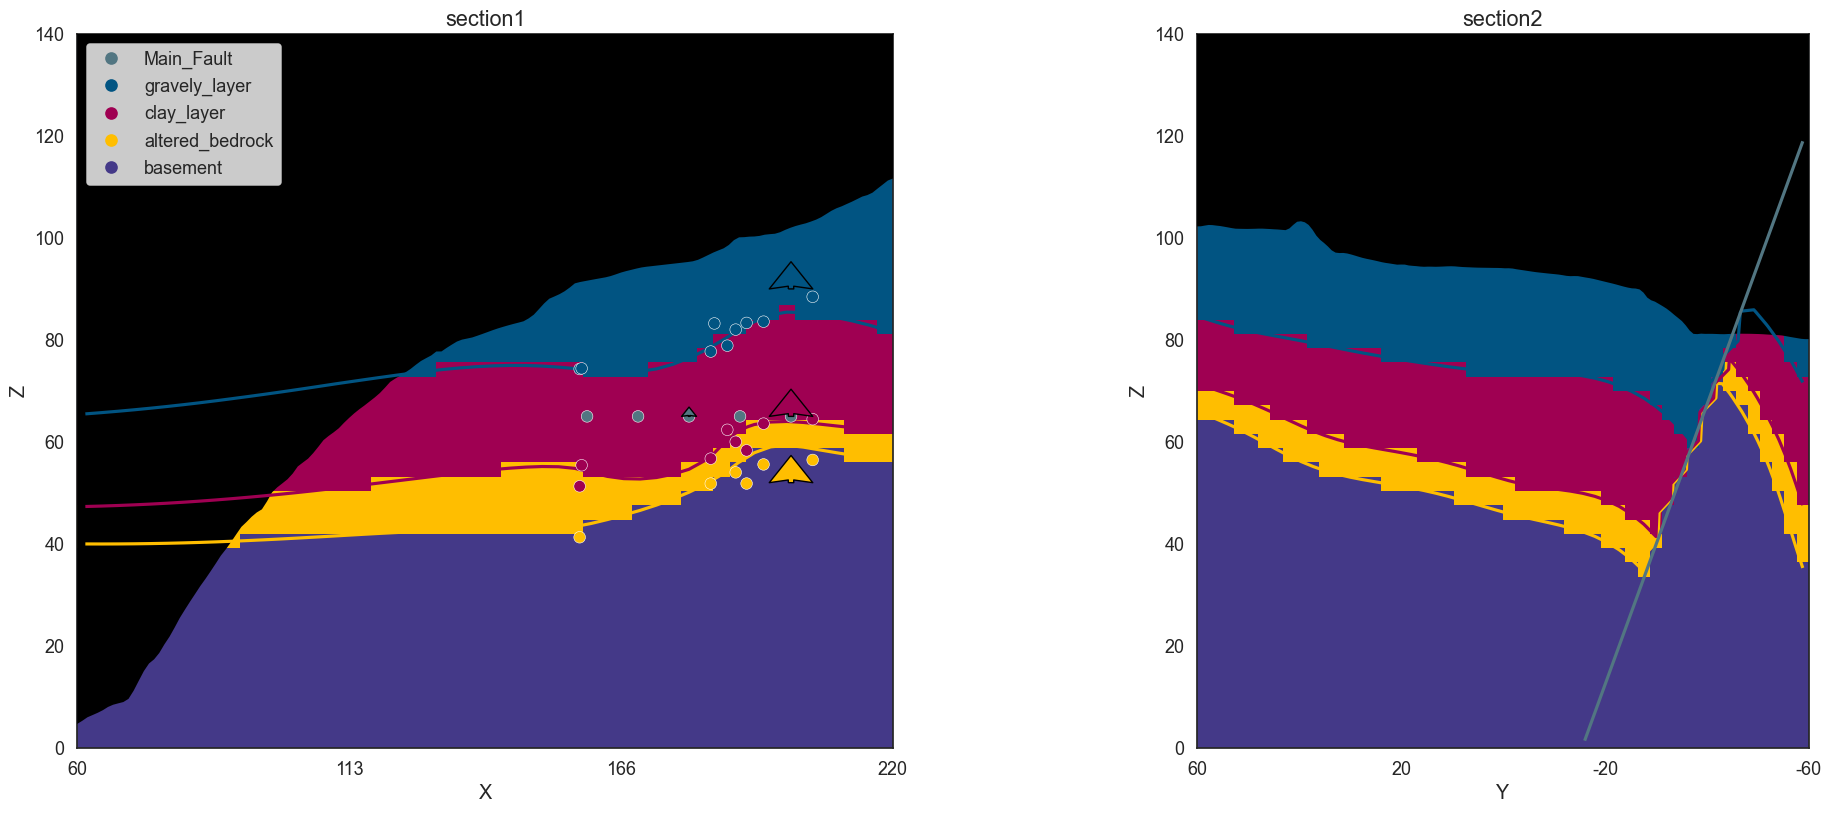

In [21]:
geo_model.set_topography(source='gdal', filepath=fp)
sol = gp.compute_model(geo_model, compute_mesh=True)
gp.plot_2d(geo_model, section_names=['section1', 'section2'],
           show_topography=True)

In [22]:
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, plotter_type='basic', show_surfaces=False, show_data=True, image=False,
                 show_topography=True)

C:\ProgramData\anaconda3\envs\gempy1_R_o_gmsh\lib\site-packages\pyvista\utilities\helpers.py:507: UserWarning: Points is not a float type. This can cause issues when transforming or applying filters. Casting to ``np.float32``. Disable this by passing ``force_float=False``.
  warnings.warn(


In [23]:
gp.save_model(geo_model)

True

In [60]:
import pyvista as pv

dir(geo_model.solutions.values_at_surface_points)
a= geo_model.solutions.surfaces.df.vertices[1]
points = pv.wrap(a)

NotImplementedError: Unable to wrap (<class 'list'>) into a pyvista type.

In [ ]:
import pyvista as pv

points = pv.wrap(a)
surf = points.reconstruct_surface(nbr_sz=10)

pl = pv.Plotter(shape=(1, 2))
pl.add_mesh(points)
pl.add_title("Point Cloud of 3D Surface")
pl.subplot(0, 1)
pl.add_mesh(surf, color=True, show_edges=True)
pl.add_title("Reconstructed Surface")
pl.show()

In [42]:
gp._plot.export_to_vtk(geo_model, path = fp)

True

In [24]:
#FLAC3D export
export_flac3D_input(geo_model, path=data_path, filename='geomodel_topo_6.f3grid')

Successfully exported geological model as FLAC3D input to C:/Users/admin/Documents/Dottorato/Conda_envs/gempy_Rousseau/Data/


In [23]:
#Function backup, the real one is in the file 'export_topo_operative.py'

def export_flac3D_input(geo_model, path=None, filename='geomodel.f3grid'):
 
    # create vertices and elements
    vertices, elements, groups = __build_vertices_elements_groups__(geo_model)

    # open output file
    # if not path:
    #    path = './'
    # if not os.path.exists(path):
    #    os.makedirs(path)

    out = open(path + filename, 'w')

    # write gridpoints
    out.write("*GRIDPOINTS")
    for i, vertice in enumerate(vertices):
        out.write(f"\nG {i + 1} {vertice[0]} {vertice[1]} {vertice[2]}")

    # write elements
    out.write('\n*ZONES')
    zone_counter = 1 

    new_column_order = [1, 2, 4, 5, 3, 8, 6, 7]

    for i, elem in enumerate(elements):
        out.write(f'\nZ B8 {zone_counter}')  
        for x in new_column_order:
            out.write(f" {elem[x]}")
        zone_counter += 1 

    # make groups
    out.write('\n*GROUPS\n')
    for grp_name, grp in groups.items():
        out.write(f'ZGROUP \"{grp_name}\"\n')
        count = 0
        for x in grp:
            out.write(f"{x} ")
            count += 1
            if count == 8:
                out.write("\n")
                count = 0
        if count != 0: out.write("\n")

    out.close()
    print("Successfully exported geological model as FLAC3D input to " + path)
    return 


def __build_vertices_elements_groups__(geo_model):

    # get model information
    nx, ny, nz = geo_model.grid.regular_grid.resolution
    xmin, xmax, ymin, ymax, zmin, zmax = geo_model.solutions.grid.regular_grid.extent

    # create vertices array
    dx, dy, dz = (xmax - xmin) / nx, (ymax - ymin) / ny, (zmax - zmin) / nz
    n_vertices = (nx + 1) * (ny + 1) * (nz + 1)
    vertices = np.zeros((n_vertices, 3), dtype='f8')
    vertices_ids = np.arange(n_vertices)  # used to generate coordinate
    vertices[:, 0] = vertices_ids % (nx + 1) * dx + xmin
    vertices[:, 1] = (vertices_ids % ((nx + 1) * (ny + 1))) // (nx + 1) * dy + ymin
    vertices[:, 2] = vertices_ids // ((nx + 1) * (ny + 1)) * dz + zmin

    # build elements
    n_elements = nx * ny * nz
    element_ids = np.arange(n_elements)  # used to generate elems
    elements = np.zeros((n_elements, 9), dtype='i8')
    i = element_ids % nz
    j = element_ids // nz % ny
    k = element_ids // (nz * ny)
    elements[:, 0] = 8  # all hex
    elements[:, 1] = 1 + i * (nx + 1) * (ny + 1) + j * (nx + 1) + k
    elements[:, 2] = elements[:, 1] + 1
    elements[:, 3] = elements[:, 2] + (nx + 1)
    elements[:, 4] = elements[:, 3] - 1
    elements[:, 5] = elements[:, 1] + ((nx + 1) * (ny + 1))
    elements[:, 6] = elements[:, 5] + 1
    elements[:, 7] = elements[:, 6] + (nx + 1)
    elements[:, 8] = elements[:, 7] - 1

    # build groups
    lith_ids = np.round(geo_model.solutions.lith_block)
    lith_ids = lith_ids.astype(int)
    sids = dict(zip(geo_model._surfaces.df['surface'], geo_model._surfaces.df['id']))
    groups = {}
    for region_name, region_id in sids.items():
        cell_ids = np.where(lith_ids == region_id)[0] + 1
        if not len(cell_ids): continue
        groups[region_name] = cell_ids

    # remove element above topography
    #mask_topo = geo_model._grid.regular_grid.mask_topo
    mask_topo = geo_model._grid.regular_grid.mask_topo
    inactive_cells = mask_topo.reshape(125000)
    if np.any(inactive_cells):
        # update correspondance
        new_id_vertices = np.zeros(len(vertices), dtype='i8')
        new_id_elements = np.zeros(len(elements), dtype='i8')
        # remove inactive cell
        elements = elements[~inactive_cells]
        new_id_elements[~inactive_cells] = np.arange(len(elements)) + 1
        # remove deleted vertices
        cond = np.isin(np.arange(len(vertices)) + 1, elements[:, 1:].flatten())
        vertices = vertices[cond]
        new_id_vertices[cond] = np.arange(len(vertices)) + 1
        # renumber vertices in element
        elements[1:] = new_id_vertices[elements[1:] - 1]
        # renumber groups
        for grp in groups.values():
            grp[:] = new_id_elements[grp - 1]

    return vertices, elements, groups

In [46]:
pip install pygmsh

  Using cached meshio-5.3.5-py3-none-any.whl.metadata (11 kB)
  Using cached rich-13.7.1-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/45.4 kB ? eta -:--:--
   --------------------------- ------------ 30.7/45.4 kB ? eta -:--:--
   ------------------------------------ --- 41.0/45.4 kB 487.6 kB/s eta 0:00:01
   ---------------------------------------- 45.4/45.4 kB 281.6 kB/s eta 0:00:00
Using cached meshio-5.3.5-py3-none-any.whl (166 kB)
Using cached rich-13.7.1-py3-none-any.whl (240 kB)
Using cached markdown_it_py-3.0.0-py3-none-any.whl (87 kB)
Using cached mdurl-0.1.2-py3-none-any.whl (10.0 kB)
Note: you may need to restart the kernel to use updated packages.
